# Visualizing Geographic Data

## Geographic Data



From **scientific fields** like **meteorology** and **climatology**, through to the software on our smartphones like **Google Maps** and **Facebook** check-ins, geographic data is always present in our everyday lives. Raw geographic data like **latitudes** and **longitudes** are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this section, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- **airlines.csv** - data on each airline.
    - **country** - where the airline is headquartered.
    - **active** - if the airline is still active.
- **airports.csv** - data on each airport.
    - **name** - name of the airport.
    - **city** - the airport is located.
    - **country** - country the airport is located.
    - **code** - unique airport code.
    - **latitude** - latitude value.
    - **longitude** - longitude value.
- **routes.csv** - data on each flight route.
    - **airline** - airline for the route.
    - **source** - starting city for the route.
    - **dest** - destination city for the route.

We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?

- Which cities are the most important hubs for airports and airlines?

Before diving into coordinate systems, explore the datasets in the code cell below.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Read in the 3 CSV files into 3 separate dataframe objects - **airlines**, **airports**, and **routes**.
- Use the **DataFrame.iloc[]** method to return the first row in each dataframe as a neat table.
- Display the first rows for all dataframes using the print() function. Try to answer the following questions:
  - What's the best way to link the data from these 3 different datasets together?
  - What are the formats of the latitude and longitude values?

In [1]:
# put your code here
import pandas as pnd
airlines = pnd.read_csv("airlines.csv")
airports = pnd.read_csv("airports.csv")
routes = pnd.read_csv("routes.csv")



## Geographic coordinate systems



A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0RVJ6c1U2Rl8wdWM">

| Name                              | City          | State | Latitude  | Longitude   |
|-----------------------------------|---------------|-------|-----------|-------------|
| White House                       | Washington    | DC    | 38.898166 | -77.036441  |
| Alcatraz Island                   | San Francisco | CA    | 37.827122 | -122.422934 |
| Instituto Metrópole Digital       | Natal         | RN    | -5.831997 | -35.205415  |

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator](https://en.wikipedia.org/wiki/Mercator_projection) projection, because it is commonly used by popular mapping software.

## Installing Basemap



Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the [basemap toolkit](http://matplotlib.org/basemap/). Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The [documentation for basemap](http://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.
Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

The easiest way to install basemap is through Anaconda. 

```python
conda install -c conda-forge basemap
```

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

```python
from mpl_toolkits.basemap import Basemap
```

Because basemap uses matplotlib, you'll want to import **matplotlib.pyplot** into your environment when you use Basemap.

In [ ]:
!conda install -c conda-forge basemap -y

## Workflow with basemap



Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the [basemap constructor](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap) and pass in values for the required parameters:

- **projection**: the map projection.
- **llcrnrlat**: latitude of lower left hand corner of the desired map domain
- **urcrnrlat**: latitude of upper right hand corner of the desired map domain
- **llcrnrlon**: longitude of lower left hand corner of the desired map domain
- **urcrnrlon**: longitude of upper right hand corner of the desired map domain

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Create a new basemap instance with the following parameters:
  - **projection**: "merc"
  - **llcrnrlat**: -80 degrees
  - **urcrnrlat**: 80 degrees
  - **llcrnrlon**: -180 degrees
  - **urcrnrlon**: 180 degrees
2. Assign the instance to the new variable **m**.

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
# put your code here


## Converting From Spherical to Cartesian Coordinates



As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use [Series.tolist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tolist.html) to convert the **longitude** and **latitude** columns from the **airports** dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

```python
x, y = m(longitudes, latitudes)
```

The basemap object will return 2 list objects, which we assign to x and y. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Convert the longitude values from spherical to Cartesian and assign the resulting list to **x**.
2. Convert the latitude values from spherical to Cartesian and assign the resulting list to **y**.

In [6]:
# put your code here
x, y = m(airports["longitude"].tolist(), airports["latitude"].tolist())

## Generating a scatter plot




Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of x and y coordinates, we use the [basemap.scatter()](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter) method.

```python
m.scatter(x,y)
```

The **basemap.scatter()** method has similar parameters to the [pyplot.scatter()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). For example, we can customize the size of each marker using the **s** parameter:

```python
# Large markers.
m.scatter(x,y,s=10)
# Smaller markers.
m.scatter(x,y,s=5)
```

After we've created the scatter plot, use **plt.show()** to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Create a scatter plot using the converted latitude and longitude values using a marker size of **1**.
2. Display the scatter plot.

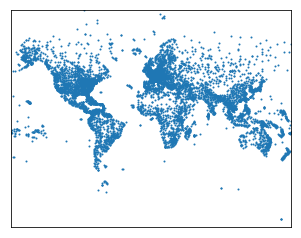

In [8]:
# put your code here
m.scatter(x, y, s=1)

## Customizing The Plot Using Basemap



You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the *basemap.drawcoastlines(color='color_name')* method. Other customization is fill the continents and inlad lakes using some background color *basemap.fillcontinents(color='color_name', lake_color='color_name')*. 
Draw the boundaries of each country is another best practice. *basemap.drawcountries(color='color_name')*


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Use *basemap.drawcoastlines()*, *basemap.fillcontinents()* and *basemap.drawcountries()* to customize your map. Tip: fillcontinents() has support to **alpha** property which sets alpha transparency for continent polygons.
2. Display the plot using **plt.show()**.


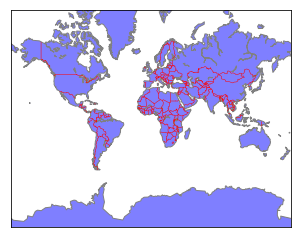

In [16]:
# put your code here
m.drawcoastlines(color="gray")
m.fillcontinents(color="blue", alpha=0.5)
m.drawcountries(color="red")



## Customizing The Plot Using Matplotlib

We can add code that:

- uses **pyplot.subplots()** to specify the **figsize** parameter
- returns the Figure and Axes object for a single subplot and assigns to **fig** and **ax** respectively
- use the **Axes.set_title()** method to set the map title

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Before creating the basemap instance and generating the scatter plot, add code that:
    - creates a figure with a height of 15 inches and a width of 20 inches
    - sets the title of the scatter plot to **"Scaled Up Earth With Coastlines"**


C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: 'AxesSubplot' object is not iterable

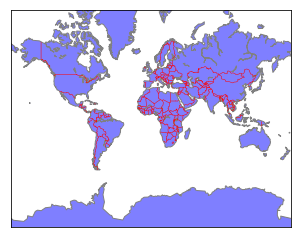

In [23]:
# put your code here
import matplotlib.pyplot as plt

m.drawcoastlines(color="gray")
m.fillcontinents(color="blue", alpha=0.5)
m.drawcountries(color="red")

ax, fig = plt.subplot()





## Introduction to Great Circles



To better understand the flight routes, we can draw **great circles** to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0blFtbmNLRlpWVkE">

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0bW9fOHBDam9DdTA">

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight **routes** from the routes dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the **routes** dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (**airports**).

To make things easier, we've created a new CSV file called **geo_routes.csv** that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Read **geo_routes.csv** into a dataframe named **geo_routes**.
2. Use the **DataFrame.info()** method to look for columns containing any null values.
3. Display the first five rows in **geo_routes**.

In [ ]:
# put your code here

## Displaying Great Circles



We use the **basemap.drawgreatcircle()** method to display a great circle between 2 points. The **basemap.drawgreatcircle()** method requires four parameters in the following order:

- **lon1** - longitude of the starting point.
- **lat1** - latitude of the starting point.
- **lon2** - longitude of the ending point.
- **lat2** - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

```python
m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
```

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the **basemap.drawgreatcircle()** method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the [documentation](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle) for the method:

**Note**: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

Write a function, named **create_great_circles()** that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:
- Accept a dataframe as the sole parameter
- Iterate over the rows in the dataframe using **DataFrame.iterrows()**
- For each row:
    - Draw a great circle using the four geographic coordinates **only** if:
        - The absolute difference between the latitude values (**end_lat** and **start_lat**) is less than 180.
        - If the absolute difference between the longitude values (**end_lon** and **start_lon**) is less than 180.
- Create a filtered dataframe containing just the routes that start at the GRU airport.
    - Select only the rows in **geo_routes** where the value for the source column equals **"GRU"**.
    - Assign the resulting dataframe to **gru**.
- Pass **dfw** into **create_great_circles()** and display the plot using the **pyplot.show()** function.

In [ ]:
# put your code here

## Guided customization




In [ ]:
from datetime import datetime
import numpy as np
# Create a figure  
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Day/Night Map for %s (UTC)' % datetime.now().strftime("%d %b %Y %H:%M:%S"))
# Configure the basemap
m.scatter(x,y,s=0.1,color="red")
m.drawcountries(color='black')
m.fillcontinents(color='#0066CC', lake_color='white', alpha=0.1)
m.drawcoastlines()
# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,10), color='#CCCCCC')
m.drawmeridians(range(-180,181,10), color='#CCCCCC')
# Day/Night shade (note the datetime is utc here)
m.nightshade(datetime.utcnow()) 
# Plot the figure
plt.show()

# Folium

## Introduction



Interactive maps are useful for data exploration and communicating research. [Leaflet](http://leafletjs.com/), an open-source JavaScript library, facilitates the development of interactive maps, but is designed to be used via JavaScript. In this mission we provide a demonstration of the [folium](http://python-visualization.github.io/folium/) package, which provides an easy to use interface to **Leaflet** for Python users.

**folium** makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for [choropleth](https://en.wikipedia.org/wiki/Choropleth_map) visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in **tilesets** from [OpenStreetMap](https://www.openstreetmap.org), [Mapbox](https://www.mapbox.com/), and [Stamen](http://maps.stamen.com/), and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

In [ ]:
# Instalation 
!conda install -c conda-forge folium -y 

## Creating a world map

You simply call the **Map** function and that is all. What is really interesting about the maps created by **folium** is that they are interactive, so you can zoom in and out after the map is rendered, which is a super useful feature.

```python
import folium
m = folium.Map()
m
```

To save the first map in a file:

```python
m.save('index.html')
```


## Creating a map of Brazil

Now let's create a world map centred around Brazil. To do that, we pass in the latitude and the longitude values of
Brazil using the location parameter and with **folium** you can set the initial zoom level using the zoom start parameter. Now I say initial because you can easily change the zoom level after the map is rendered by zooming in or zooming out. You can play with this parameter to figure out what the initial zoom level looks like for different values. 

```python
m = folium.Map(
    location=[-15.765379, -47.968776],
    zoom_start=4
)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Print folium version using the attribute \_\_version\_\_.
- Start a new map change the **location** parameter to Natal-RN.
- Play with **zoom_start** parameter to figure out what the initial zoom level looks like for different values.

In [12]:
# put your code here
import folium as folium

m = folium.Map(
    location=[-5.79448, -35.211],
    zoom_start=12)
m

## Maps styles




Another amazing feature of Folium is that you can create different map styles using the tiles parameter. The default tiles are set to **OpenStreetMap**, but **Stamen Terrain**, **Stamen Toner**, **Stamen Watercolor**, **Mapbox Bright**, **Mapbox Control Room**, and many others tiles are built in. Please see all options using keyboard shortcuts (shift+tab) over **Map** function.

```python
m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='Stamen Toner',
    zoom_start=4
)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

1. Create **eight maps** using the follow tiles options: 'OpenStreetMap', 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'cartodbdark_matter', 'cartodbpositron',  'Mapbox Bright', 'Mapbox Control Room'.

In [23]:
# put your code here
m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='OpenStreetMap',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='Stamen Terrain',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='Stamen Toner',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='Stamen Watercolor',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='cartodbdark_matter',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='cartodbpositron',
    zoom_start=4)
m

m = folium.Map(
    location=[-15.765379, -47.968776],
    tiles='Mapbox Control Room',
    zoom_start=4)
m




## Maps with markers



We will continue working with the **folium** library and learn how to superimpose markers on top of a map for interesting visualizations. 

There are numerous marker types, starting with a simple **leaflet** style location marker with a popup. The command **folium.Marker()** is used to insert markers into the map. 

```python
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    tiles='Stamen Terrain',
    width='50%',
    height='50%'
)
folium.Marker([-5.832187, -35.205432], popup='<i>Instituto Metrópole Digital</i>').add_to(m)
folium.Marker([-5.842942, -35.198001], popup='<b>Centro Tecnológico</b>').add_to(m)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Insert in a map the first three **Top-rated Natal Things to Do** according to [Tripadvisor website](https://www.tripadvisor.com/).
2. Plot the map.


In [30]:
# put your code here
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=10,
    tiles="Stamen Terrain",
    width="50%",
    height="50%"
)

folium.Marker([-5.7143009,-35.2313274], popup="<i>Dunas de Genipabu</i>").add_to(m)
folium.Marker([-5.8758694,-35.1788169], popup="<i>Praia de Ponta Negra</i>").add_to(m)
folium.Marker([-5.8294961,-35.2256142], popup="<i>Parque das Dunas</i>").add_to(m)

m

## Color and icon types



There is built in support for colors and marker icon types from bootstrap.

```python
folium.Marker([-5.832187, -35.205432], 
              popup='<i>Instituto Metrópole Digital</i>',
              icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker([-5.842942, -35.198001], 
              popup='<b>Centro Tecnológico</b>',
              icon=folium.Icon(color='red',
                               icon_color='yellow',
                               icon='info-sign')).add_to(m)
```

According to [documentation](https://python-visualization.github.io/folium/docs-v0.6.0/modules.html) the following colors are supported:

```python
 ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']
```

There are a huge amount of icon in [Font Awesome website](http://fontawesome.io/icons/). You just need add the adequate **prefix** information as parameter to **folium.Icon** function. 

```python
...
 icon=folium.Icon(color='red',
                  icon_color='yellow',
                  icon='bicycle',
                  prefix='fa')).add_to(m)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Configure the previous exercise to use icons suitable to the places.
2. Plot the map.



In [36]:
# put your code here
# put your code here
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=10,
    tiles="Stamen Terrain",
    width="50%",
    height="50%"
)

folium.Marker([-5.7143009,-35.2313274], 
                icon=folium.Icon(color="red", icon_color="blue", icon="bicycle", prefix="fa"), 
              popup="<i>Dunas de Genipabu</i>").add_to(m)
folium.Marker([-5.8758694,-35.1788169], 
              icon=folium.Icon(color="red", icon_color="blue", icon="bicycle", prefix="fa"),
              popup="<i>Praia de Ponta Negra</i>").add_to(m)
folium.Marker([-5.8294961,-35.2256142], 
              icon=folium.Icon(color="red", icon_color="blue", icon="bicycle", prefix="fa"),
              popup="<i>Parque das Dunas</i>").add_to(m)


m

## Marker Clusters



### Insert random markers to clusters

In [ ]:
import numpy as np
import folium
from folium import plugins

# size of sample
N = 100

# lat and lng sample
data = np.array(
    [
        np.random.uniform(low=-6.4245, high=-5.2660, size=N),  # Random latitudes in RN state.
        np.random.uniform(low=-38.6200, high=-35.1782, size=N)  # Random longitudes in RN state.
    ]
).T

# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    tiles='Stamen Terrain',
    width='75%',
    height='75%'
)

# Make a cluster
plugins.MarkerCluster(data).add_to(m)

m

### Insert particular markers to a cluster


In [ ]:
# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    tiles='Stamen Terrain',
    width='75%',
    height='75%'
)

# Create a cluster
marker_cluster = plugins.MarkerCluster().add_to(m)

folium.Marker([-5.832187, -35.205432], popup='<i>Instituto Metrópole Digital</i>').add_to(marker_cluster)
folium.Marker([-5.842942, -35.198001], popup='<b>Centro Tecnológico</b>').add_to(marker_cluster)

m


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Create a map with markers of top 10 hotels (review score) in [Booking](https://www.booking.com/) to Natal-RN.
2. Use suitable icons for each place.
3. Create a cluster to join the places.
4. Plot the map.



In [44]:
import numpy as np

# put your code here
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=10,
    tiles="Stamen Terrain",
    width="80%",
    height="80%")

marker_cluster = plugins.MarkerCluster().add_to(m)

folium.Marker([-6.4245, -5.2660], icon=folium.Icon(color="red", icon_color="blue", icon="bicycle", prefix="fa"),
             popup="hotel de teste1").add_to(marker_cluster)

folium.Marker([-38.6200, -35.1782], icon=folium.Icon(color="red", icon_color="blue", icon="bicycle", prefix="fa"),
             popup="hotel de teste2").add_to(marker_cluster)

m


### Heatmap

In [43]:
from folium.plugins import HeatMap
from folium import plugins
import numpy as np

# size of sample
N = 100

# lat and lng sample
data = np.array(
    [
        np.random.uniform(low=-6.4245, high=-5.2660, size=N),  # Random latitudes in RN state.
        np.random.uniform(low=-38.6200, high=-35.1782, size=N)  # Random longitudes in RN state.
    ]
).T

# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    tiles='Stamen Terrain',
    width='75%',
    height='75%'
)

# data : list of points of the form [lat, lng] or [lat, lng, weight]
HeatMap(data).add_to(m)

m

## How to create popups


**folium** enables passing any HTML object as a popup, including [bokeh](https://bokeh.pydata.org/en/latest/) plots, but there is a built-in support for [vincent](https://github.com/wrobstory/vincent) and [altair](https://altair-viz.github.io/) visualizations to any marker type, with the visualization as the popover.




### A convenience function to enable lat/lng popovers

In [46]:
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    tiles='Stamen Terrain',
    width='50%',
    height='50%'
)
m.add_child(folium.LatLngPopup())
m

### Vega popup

You may know that it's possible to create awesome [Vega](https://github.com/vega/vega) charts with (or without) [vincent](https://github.com/wrobstory/vincent). If you're willing to put one inside a popup, it's possible thanks to **folium.Vega**

In [50]:
# Just in case using colab
!pip --upgrade


Usage:   
  pip <command> [options]

no such option: --upgrade


In [51]:
import json
import numpy as np
import vincent

# Dictionary is the dataset
scatter_points = {
    'x': np.random.uniform(size=(100,)),
    'y': np.random.uniform(size=(100,)),
}

# Let's create the vincent chart.
scatter_chart = vincent.Scatter(scatter_points,
                                iter_idx='x',
                                width=400,
                                height=200)

# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    width='80%',
    height='80%',
    tiles='Stamen Terrain',
)

# Create an object popup and adding a graph for it
popup = folium.Popup(max_width=500)
folium.Vega(scatter_chart, height=250, width=450).add_to(popup)

# Print a icon on map
folium.Marker([-5.832187, -35.205432], 
              icon=folium.Icon(icon='cloud'),
              popup=popup).add_to(m)
m

### Pandas popup

In [52]:
import pandas as pd

# Create a dataframe
df = pd.DataFrame(data=[['2016', 'A'], ['2017', 'A+']], columns=['Year', 'Grade'])

# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    width='50%',
    height='50%',
    tiles='Stamen Terrain',
)

# Render a DataFrame as an HTML table.
html = df.to_html(classes='table table-striped table-hover table-condensed table-responsive')

# Create a popup
popup = folium.Popup(html)

# Print a icon on map
folium.Marker([-5.832187, -35.205432], 
              icon=folium.Icon(icon='cloud'),
              popup=popup).add_to(m)
m